### Objective: Make a model to predict the app rating, with other information about the app provided.

### Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

### Domain: 
General

### Analysis to be done: 
The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

### Content:
Dataset: Google Play Store data (“googleplaystore.csv”)

### Prepared by : Bushra Tasnim Zahed

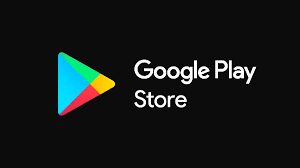
### Acknowledgements
The dataset is obtained from PCP DA - Programming Foundation and Data Analytics with Python course assessment project.
### Inspiration
Higher app ratings can lead to increased app downloads and a better app store ranking. Analyzing app ratings can help identify features that users appreciate and use them to promote the app to a broader audience.

## Setup
### Importing Libraries

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
from prettytable import PrettyTable
import matplotlib.pyplot as plt
%matplotlib inline


### 1. Load the data file using pandas.

In [205]:
df = pd.read_csv('googleplaystore.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [206]:
df.shape

(10841, 13)

In [207]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [208]:
df.dtypes.groupby(df.dtypes.values).count()

float64     1
object     12
dtype: int64

In [209]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

## Cleaning data and checking for inconsistency 
### 2. Check for null values in the data. Get the number of null values for each column.

In [210]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

We notice that Rating, Type,Content_Rating, Current_Ver and Android_Ver attributes have 1474, 1, 1, 8 and 3 numbers of missing values respectively.

### 3. Drop records with nulls in any of the columns. 

In [211]:
df.drop(['Current_Ver', 'Android_Ver'], axis=1,inplace=True)
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated'],
      dtype='object')

In [212]:
df.dropna(subset="Rating",axis=0, inplace=True)

In [213]:
df.shape

(9367, 11)

## 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

### 4.1 Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

In [214]:
def clean_Size(val):
    return val.replace(".","").replace("M","").replace("k","").replace("Varies with device","0")
#type(clean_Size(('8.7M')))
df.Size = df.Size.apply(clean_Size)
df['Size'] = df['Size'].apply(lambda x: x.replace('+', '').replace(',','')).astype(int)

In [215]:
df['Size'].dtypes

dtype('int32')

### 4.2 Price field is a string and has dollar symbol. Remove dollar sign, and convert it to numeric.

In [216]:
df["Price"].sort_values()

4773        $0.99
8219        $0.99
9060        $0.99
10682       $0.99
9057        $0.99
           ...   
3312            0
3313            0
3314            0
3308            0
10472    Everyone
Name: Price, Length: 9367, dtype: object

In [217]:
df.drop(index=10472,inplace=True)
df['Price']=df['Price'].apply(lambda x: str(x).replace('$','')if '$' in str(x) else str(x))
df["Price"]=df.Price.astype(float)

### 4.3 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [218]:
df['Reviews'] = df['Reviews'].astype(int)
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs           object
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
dtype: object

### 4.4 Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

In [219]:
# Remove '+' and ',' characters and convert 'Installs' to integer
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '').replace('+', '')).astype(int)
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size                int32
Installs            int32
Type               object
Price             float64
Content_Rating     object
Genres             object
Last_Updated       object
dtype: object

### 5. Sanity checks: 

### 5.1 Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [220]:
df["Rating"].sort_values(ascending=False)

9056     5.0
8395     5.0
8493     5.0
6330     5.0
6342     5.0
        ... 
7806     1.0
10591    1.0
7427     1.0
7926     1.0
4127     1.0
Name: Rating, Length: 9366, dtype: float64

### 5.2 Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [222]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25,1,Free,0.00,Everyone,Medical,"August 2, 2018"
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018"
5917,Ra Ga Ba,GAME,5.0,2,20,1,Paid,1.49,Everyone,Arcade,"February 8, 2017"
6700,Brick Breaker BR,GAME,5.0,7,19,5,Free,0.00,Everyone,Arcade,"July 23, 2018"
7402,Trovami se ci riesci,GAME,5.0,11,61,10,Free,0.00,Everyone,Arcade,"March 11, 2017"
8591,DN Blog,SOCIAL,5.0,20,42,10,Free,0.00,Teen,Social,"July 23, 2018"
10697,Mu.F.O.,GAME,5.0,2,16,1,Paid,0.99,Everyone,Arcade,"March 3, 2017"


In [223]:
df.drop(df[df['Reviews']>df['Installs']].index,inplace=True)
df.shape

(9359, 11)

### 5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [224]:
#Performing the sanity checks on prices of free apps
df[(df.Type == "Free") & (df.Price > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated


### Write Clean Data to new file for further exploration

In [225]:
df.to_csv("googleappstore_cleandata.csv")

## 5. Performing univariate analysis: 

### Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.



In [233]:
df["Price"].sort_values(ascending = False).head(16)

4367    400.00
5362    399.99
5373    399.99
5351    399.99
4197    399.99
5354    399.99
5356    399.99
4362    399.99
5358    399.99
5369    399.99
5359    399.99
5364    399.99
5366    389.99
5357    379.99
5355    299.99
2365     79.99
Name: Price, dtype: float64

In [234]:
# Filtering the DataFrame to only include apps with a price over 200
expensive_apps = df[df['Price'] > 200]
# Calculating the percentage of expensive apps
percentage_expensive = (len(expensive_apps) / len(df)) * 100
percentage_expensive

0.1602735334971685

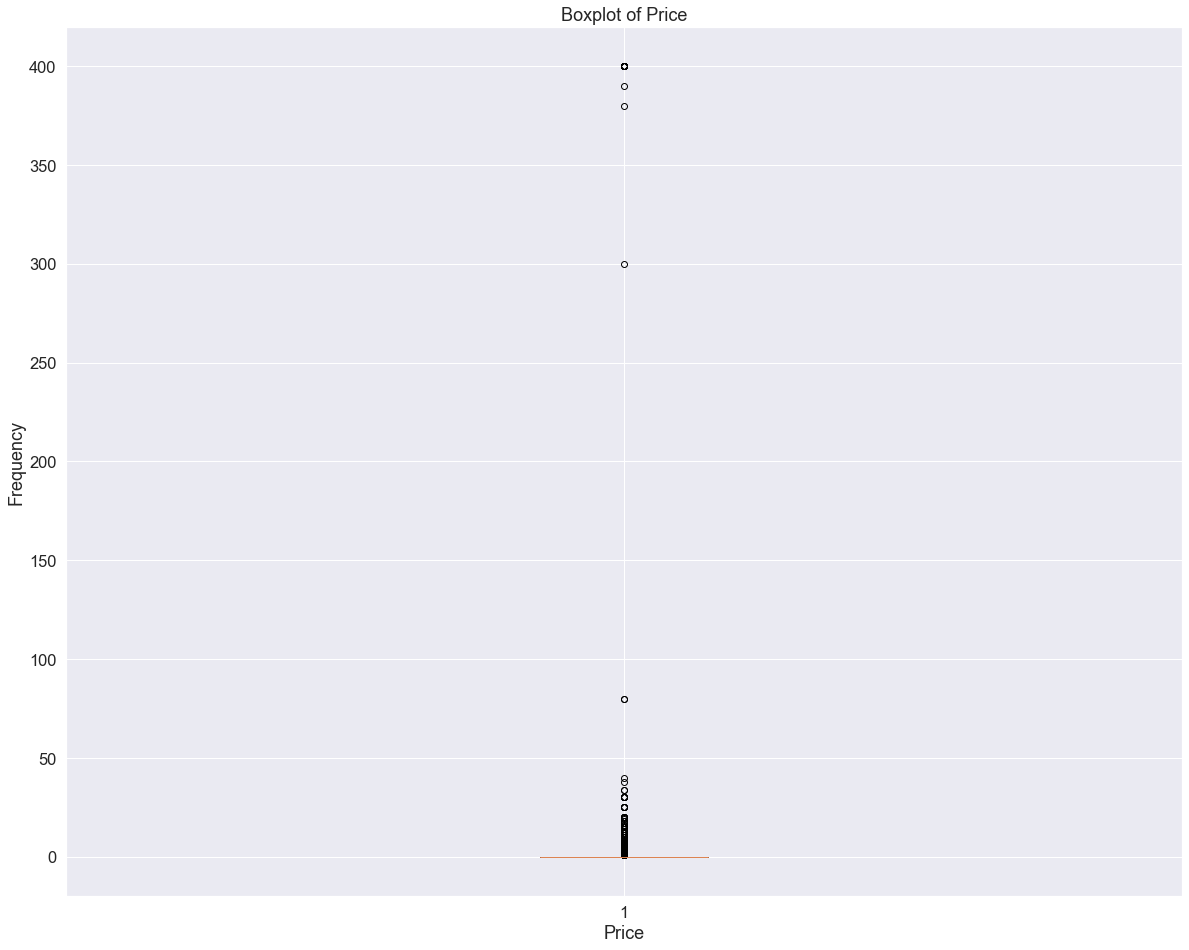

In [227]:
# Creating boxplot for 'Price' column
fig, ax = plt.subplots(figsize=(20, 16))
ax.boxplot(df['Price'])

# Setting the title and axis labels
ax.set_title('Boxplot of Price')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')

# Showing the plot
plt.show()

Regarding outliers, the boxplot can help us identify any values that are unusually high or low. From the example data provided in this code snippet, we can see that most of the apps are free or cost is under $100 . There's  about 16% of apps whose price is over 200 dollars value which can be considered outlier than overall apps. However, we need to keep in mind that this is just an example dataset and may not be representative of the typical prices of apps on the Play Store.

### Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

In [244]:
df["Reviews"].sort_values(ascending = False).head(4000)

2544    78158306
3943    78128208
336     69119316
381     69119316
3904    69109672
          ...   
5402       14145
2995       14123
3218       14114
3831       14110
8647       14089
Name: Reviews, Length: 4000, dtype: int32

In [247]:
# Filtering the DataFrame to only include apps with a price over 200
outlier_reviews= df[df['Reviews'] > 400000]
# Calculating the percentage of expensive apps
percentage_outlier_reviews = (len(outlier_reviews) / len(df)) * 100
percentage_outlier_reviews

12.426541297147132

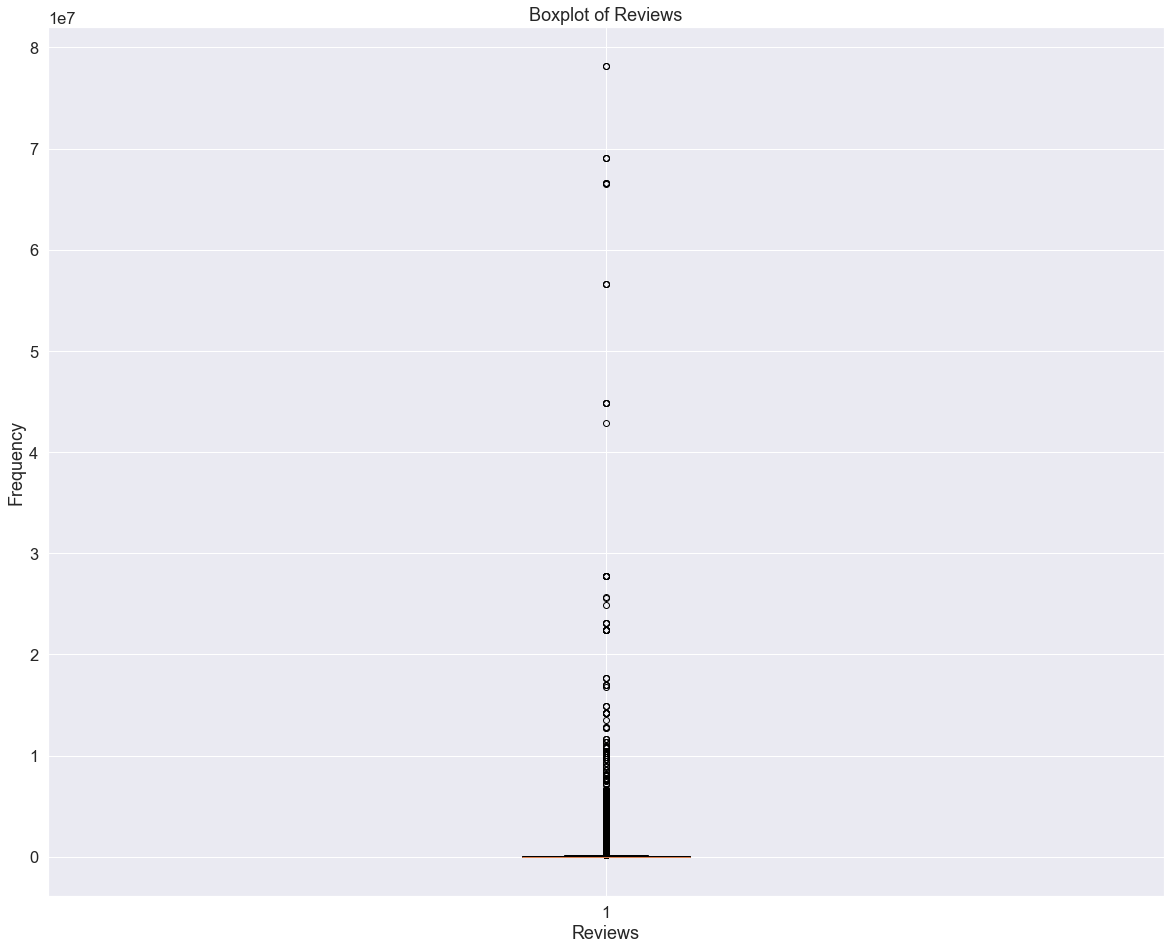

In [235]:
# Creating boxplot for 'Price' column
fig, ax = plt.subplots(figsize=(20, 16))
ax.boxplot(df['Reviews'])

# Setting the title and axis labels
ax.set_title('Boxplot of Reviews')
ax.set_xlabel('Reviews')
ax.set_ylabel('Frequency')

# Showing the plot
plt.show()

Regarding outliers, the boxplot can help us identify any values that are unusually high or low. From the example data provided in this code snippet, we can see there's about 12.42% reviews which can be considered outlier than overall apps. However, we need to keep in mind that this is just an example dataset and may not be representative of the typical prices of apps on the Play Store.

### Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?



In [249]:
print('The skewness of this distribution is',df['Rating'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df.Rating.median(),df.Rating.mean()))

The skewness of this distribution is -1.8530611951252525
The Median of this distribution 4.3 is greater than mean 4.191174270755429 of this distribution


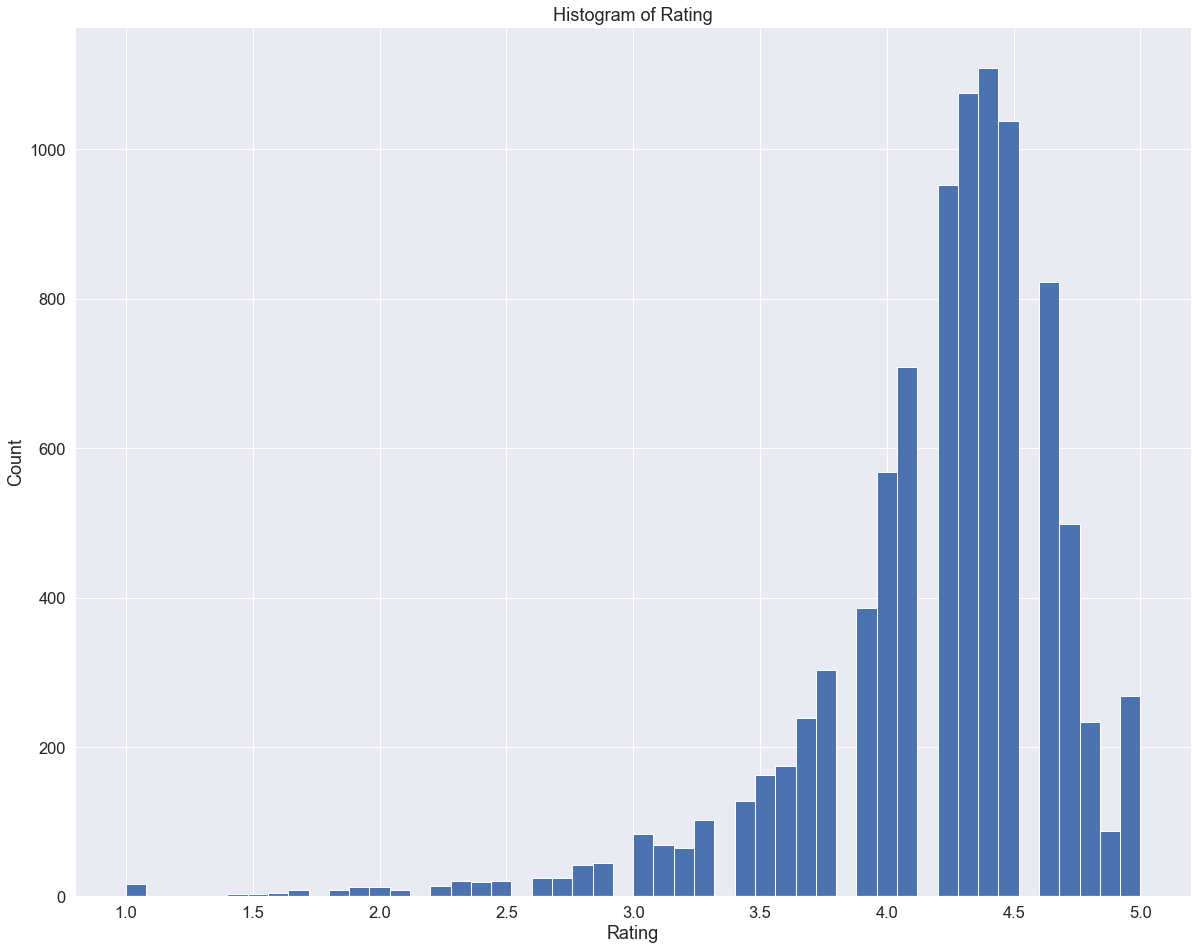

In [248]:
plt.figure(figsize=(20,16))
plt.hist(df['Rating'], bins=50)

# Add some labels and a title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Histogram of Rating')

# Show the plot
plt.show()

In general, a negative skewness indicates that the distribution is not symmetrical and that the mean may not be a good representative of the central tendency of the data. It is important to take this into account when analyzing the data and to consider other measures, such as the median, to get a more accurate picture of the data. This means that the tail of the distribution is longer on the negative side, indicating that there are more data points with smaller values.The peak of the distribution will be shifted towards the right, indicating that the most common values are larger than the mean of the distribution.

When the median of a distribution is greater than the mean, it means that the distribution is skewed to the left, and that there are extreme values on the lower end of the distribution pulling the mean down. The median is less affected by these extreme values and is a better representative of the central tendency of the dataset in a skewed distribution. It is important to consider the skewness of the distribution and use appropriate measures of central tendency when analyzing the data.

median > mean, The distribution of Rating is Negatively Skewed.Therefore distribution of Rating is more Skewed towards lower values. 

### Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

In [252]:
print('The skewness of this distribution is',df['Size'].skew())
print('The Median of this distribution {} is greater than mean {} of this distribution'.format(df.Size.median(),df.Size.mean()))

The skewness of this distribution is 7.263156923851475
The Median of this distribution 29.0 is greater than mean 44.66513516401325 of this distribution


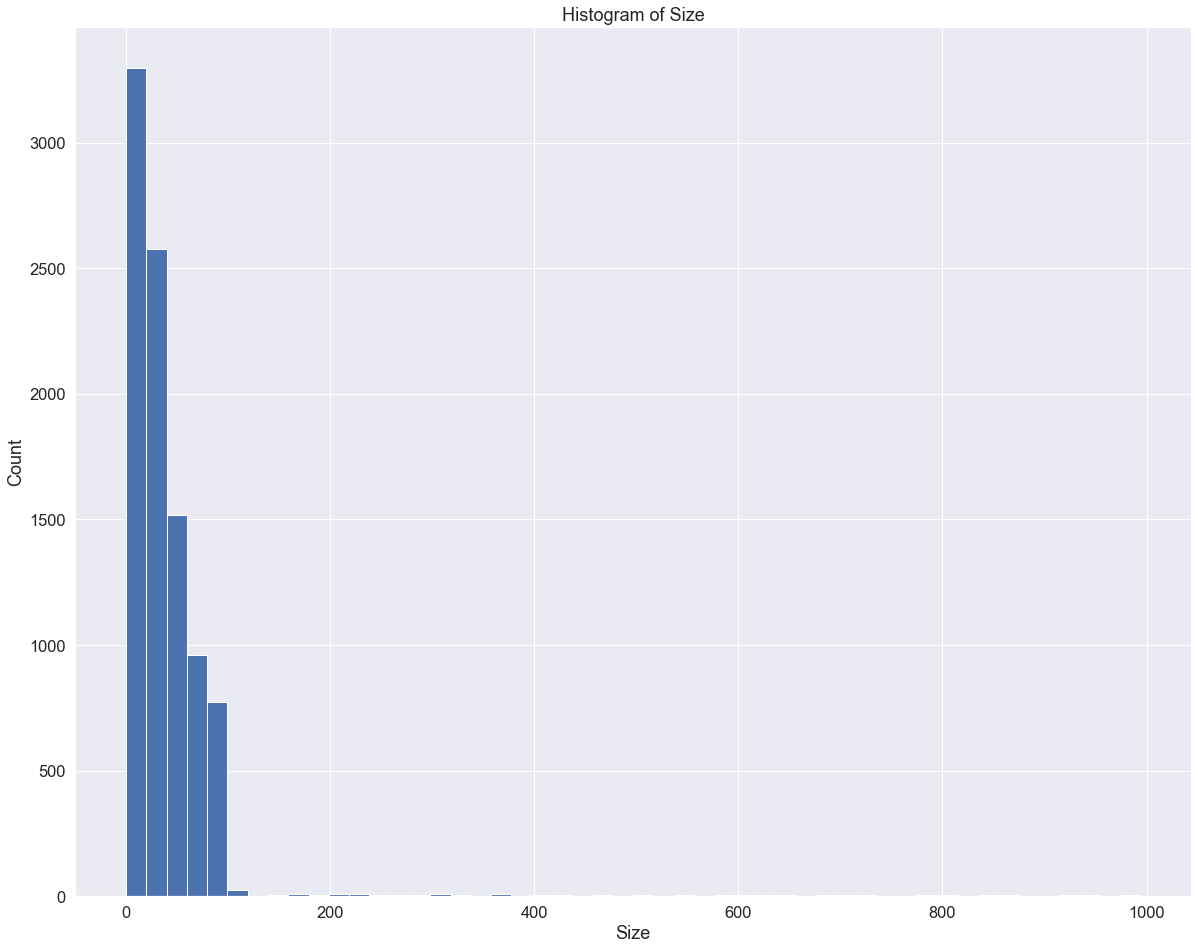

In [253]:
plt.figure(figsize=(20,16))
plt.hist(df['Size'], bins=50)

# Add some labels and a title
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Histogram of Size')

# Show the plot
plt.show()

A high positive skewness (7.26) indicates a highly positively skewed distribution, meaning there are more data points with larger values. When the median (29) is less than the mean (44.67), it suggests that there are extreme high values pulling the mean up. Therefore, the distribution is highly positively skewed with a few extreme high values making the mean higher than the median. It is important to use appropriate measures of central tendency depending on the characteristics of the distribution to get an accurate picture of the data.

## 6. Outlier treatment: 

### 6.1 Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

In [255]:
df.drop(df[df.Price > 200].index,inplace=True)

In [256]:
df.shape

(9344, 11)

### 6.2 Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [258]:
df[df.Reviews > 20000000].shape

(37, 11)

In [259]:
df.drop(df[df.Reviews > 20000000].index,inplace=True)

In [260]:
df.shape

(9307, 11)

### 6.3 Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

In [261]:
df['Installs'].describe()

count    9.307000e+03
mean     1.529249e+07
std      7.788556e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [262]:
df['Installs'].quantile([.1, .25, .5, .70, .90, .95, .99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      5000000.0
0.90     10000000.0
0.95    100000000.0
0.99    500000000.0
Name: Installs, dtype: float64

In [263]:
df.drop(df[df['Installs'] > 10000000].index, inplace = True)

In [264]:
df.shape

(8516, 11)

## 7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

### 7.1 Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

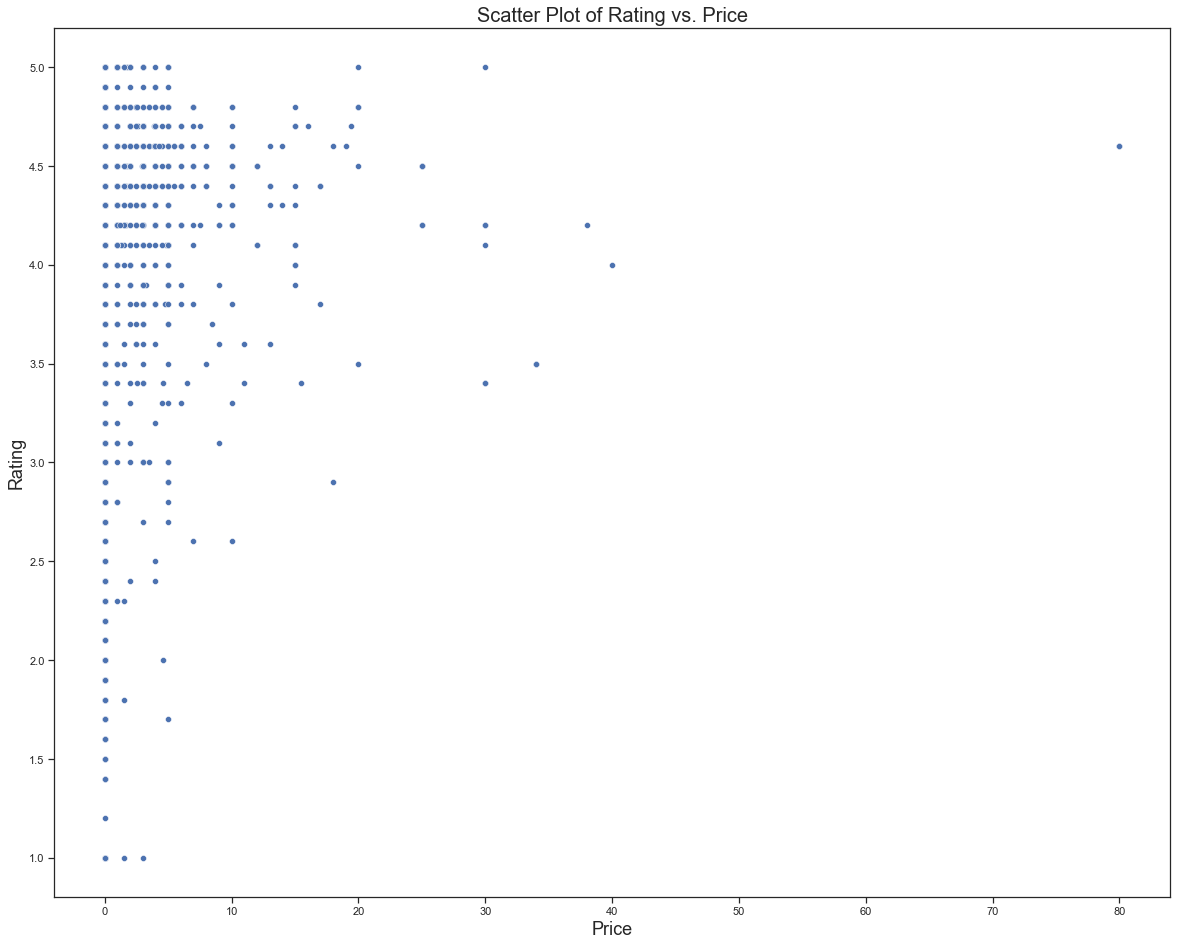

In [268]:
plt.figure(figsize=(20,16))
sns.scatterplot(x="Price", y="Rating", data=df)
plt.title("Scatter Plot of Rating vs. Price", fontsize=20)
plt.xlabel("Price",fontsize=18)
plt.ylabel("Rating",fontsize=18)
plt.show()

(0.0, 5.239479442453023)

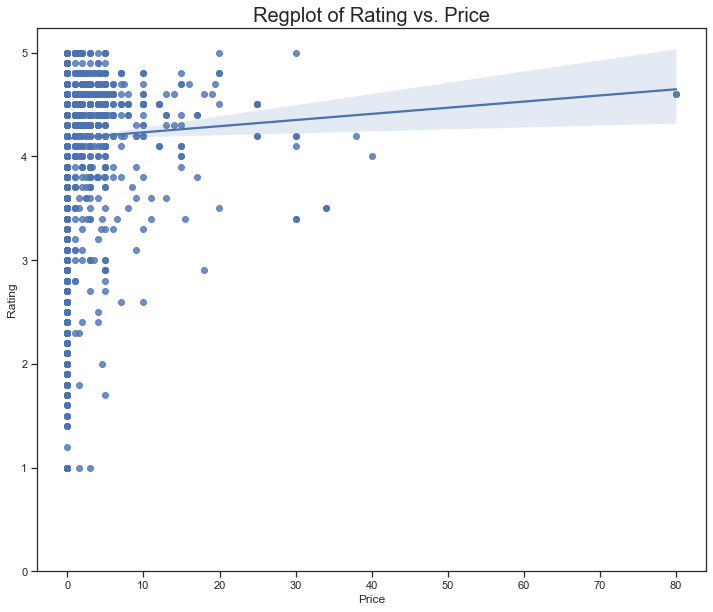

In [278]:
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.title("Regplot of Rating vs. Price", fontsize=20)
sns.regplot(x="Price", y="Rating", data=df)
plt.ylim(0,)

<Figure size 1440x1152 with 0 Axes>

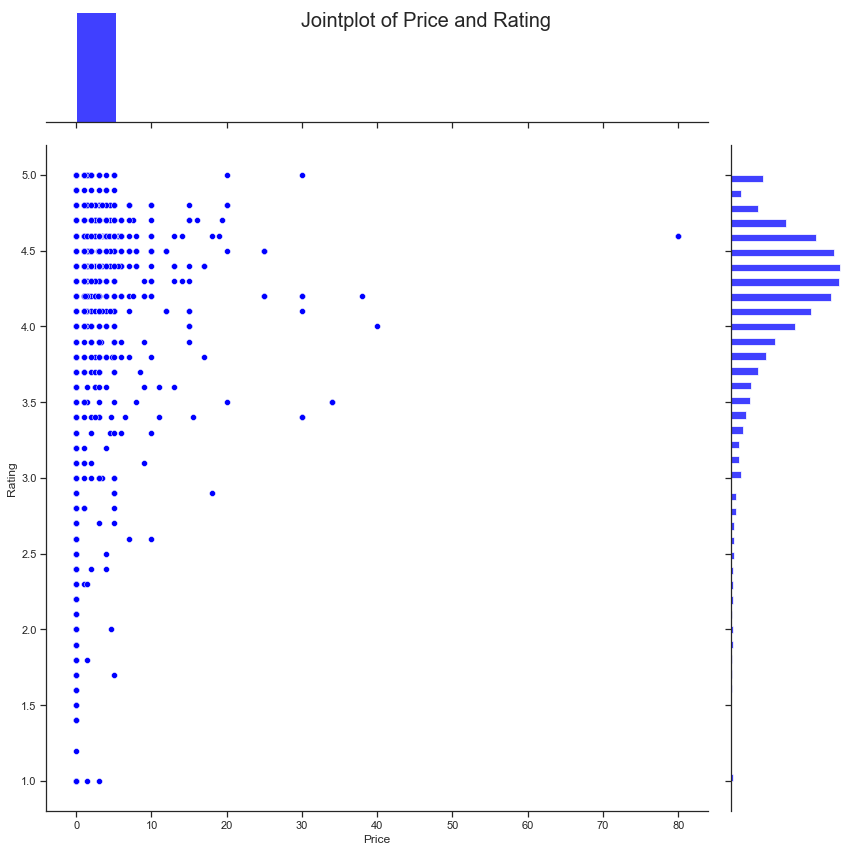

In [286]:
plt.figure(figsize = (20,16))
g = sns.jointplot(x="Price", y="Rating",color = 'blue', data=df,height = 12);
plt.suptitle('Jointplot of Price and Rating', fontsize=20)
plt.xlabel('Price', fontsize=18)
plt.ylabel('Rating', fontsize=18)
plt.show()

Free apps tend to have more ratings than expensive apps as the lower price point attracts a larger user base who are more willing to download and try the app. Additionally, free apps may have higher visibility in app stores and may be more likely to be recommended by others, further contributing to more ratings. In contrast, expensive apps may have a smaller user base due to the higher price point and users who have paid for the app may have higher expectations and be more selective about leaving a rating or review. But we notice, the rating increases with app prices. The increase in rating with price may be due to higher user expectations for more expensive apps, which may offer more features and a better user experience. Users who are willing to pay a higher price may be more committed and likely to leave a rating, contributing to a higher number of ratings. Additionally, better marketing campaigns may lead to more feedback from users for expensive apps. Ultimately, the pricing of an app can significantly impact the number of downloads and ratings it receives.

### 7.2 Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

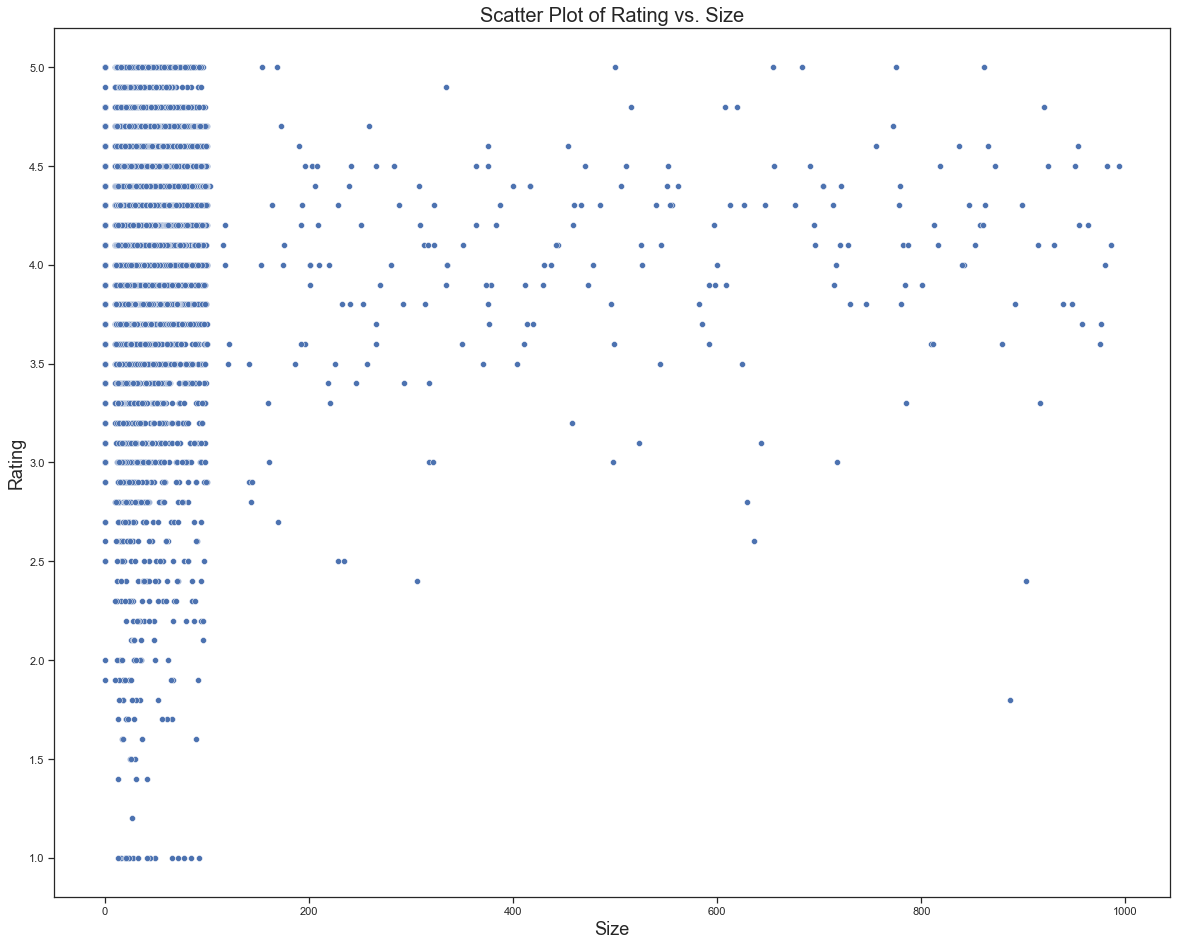

In [275]:
plt.figure(figsize=(20,16))
sns.scatterplot(x="Size", y="Rating", data=df)
plt.title("Scatter Plot of Rating vs. Size", fontsize=20)
plt.xlabel("Size",fontsize=18)
plt.ylabel("Rating",fontsize=18)
plt.show()

(0.0, 5.2)

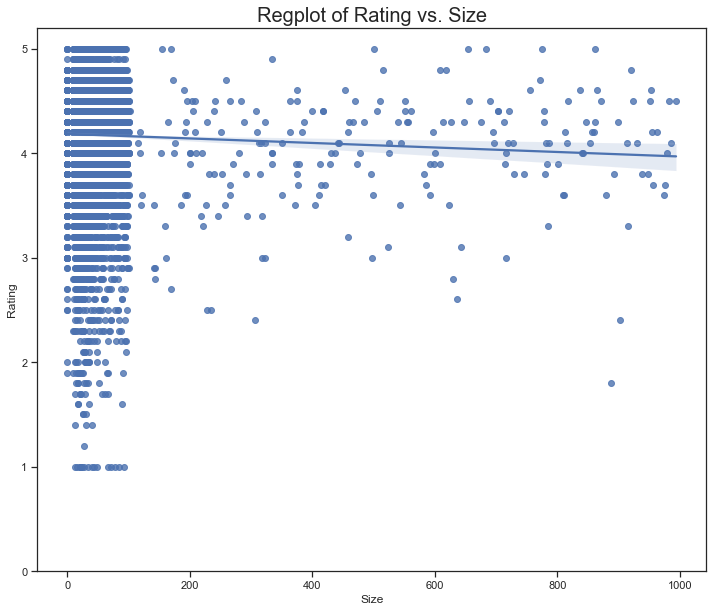

In [277]:
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.title("Regplot of Rating vs. Size", fontsize=20)
sns.regplot(x="Size", y="Rating", data=df)
plt.ylim(0,)

<Figure size 1440x1152 with 0 Axes>

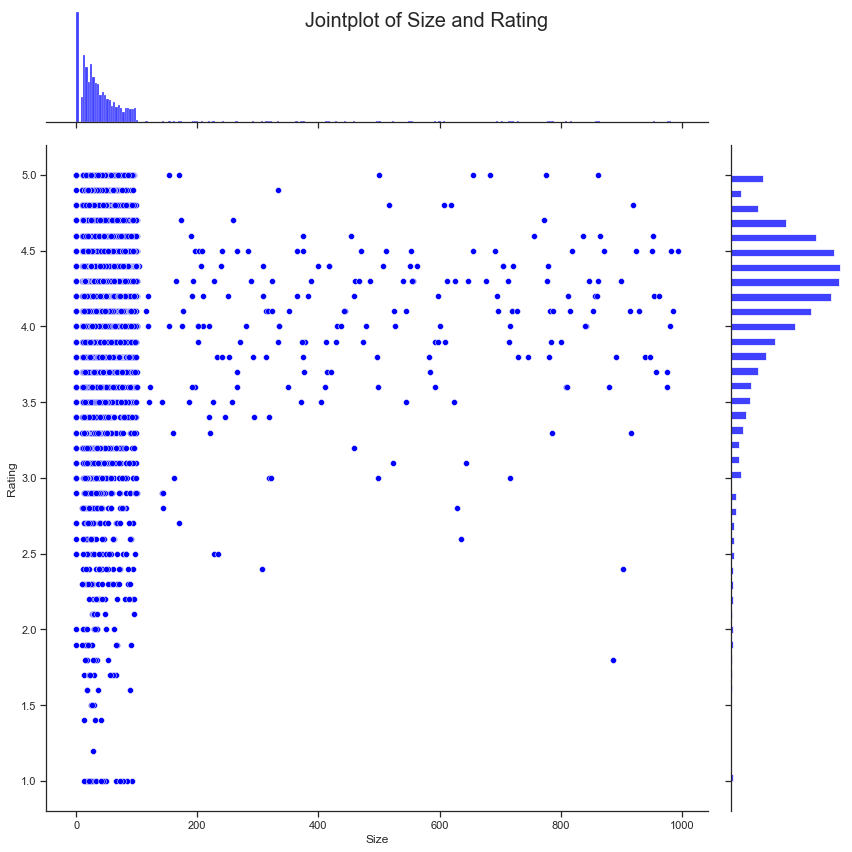

In [285]:
plt.figure(figsize = (20,16))
g = sns.jointplot(x="Size", y="Rating",color = 'blue', data=df,height = 12);
plt.suptitle('Jointplot of Size and Rating', fontsize=20)
plt.xlabel('Size', fontsize=18)
plt.ylabel('Rating', fontsize=18)
plt.show()

The higher density of ratings for lighter apps may be due to the fact that they have a smaller range of features and functionalities, making it easier for users to evaluate and provide more consistent ratings. In contrast, heavier apps with more features and functionalities may have a wider range of user experiences, resulting in more scattered ratings. Additionally, heavier apps may be more complex and have more technical issues, which can also contribute to a wider range of ratings.

## 7.3 Make scatter plot/joinplot for Rating vs. Reviews
Does more review mean a better rating always?

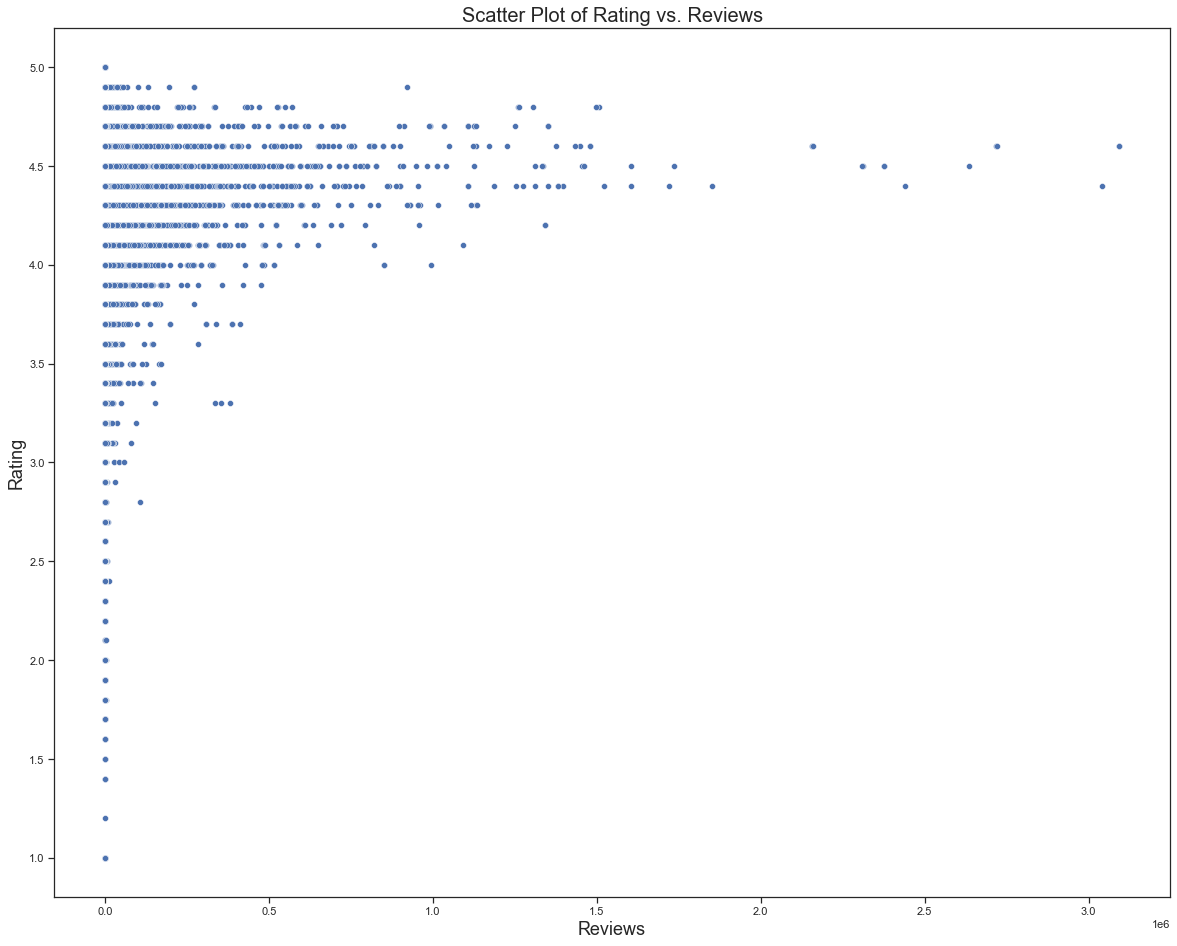

In [288]:
plt.figure(figsize=(20,16))
sns.scatterplot(x="Reviews", y="Rating", data=df)
plt.title("Scatter Plot of Rating vs. Reviews", fontsize=20)
plt.xlabel("Reviews",fontsize=18)
plt.ylabel("Rating",fontsize=18)
plt.show()

(0.0, 5.785335777859715)

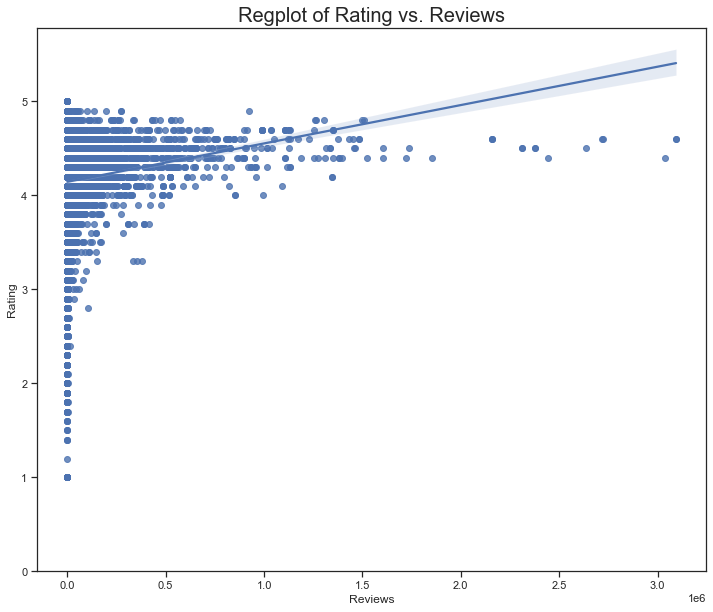

In [289]:
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.title("Regplot of Rating vs. Reviews", fontsize=20)
sns.regplot(x="Reviews", y="Rating", data=df)
plt.ylim(0,)

<Figure size 1440x1152 with 0 Axes>

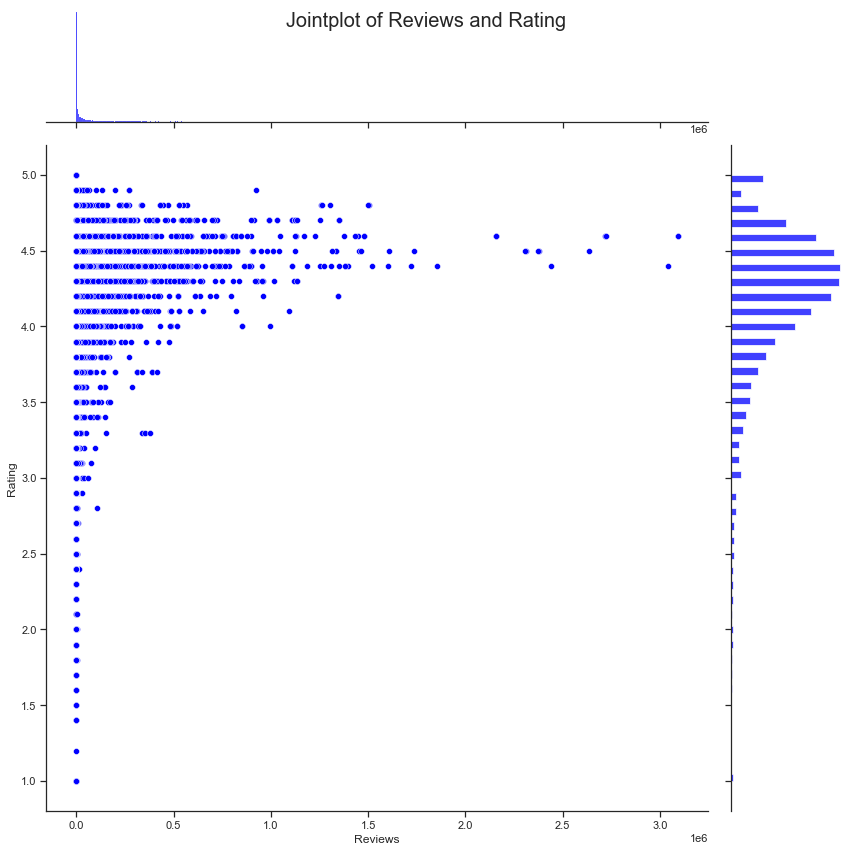

In [290]:
plt.figure(figsize = (20,16))
g = sns.jointplot(x="Reviews", y="Rating",color = 'blue', data=df,height = 12);
plt.suptitle('Jointplot of Reviews and Rating', fontsize=20)
plt.xlabel('Reviews', fontsize=18)
plt.ylabel('Rating', fontsize=18)
plt.show()

There is typically a positive correlation between the number of reviews and the rating of an app. This is because more reviews can provide a better representation of user experiences, and apps with a high number of reviews are more likely to have a higher proportion of positive reviews. However, this relationship may not hold true in all cases, and other factors can also influence an app's rating.

### 7.4 Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

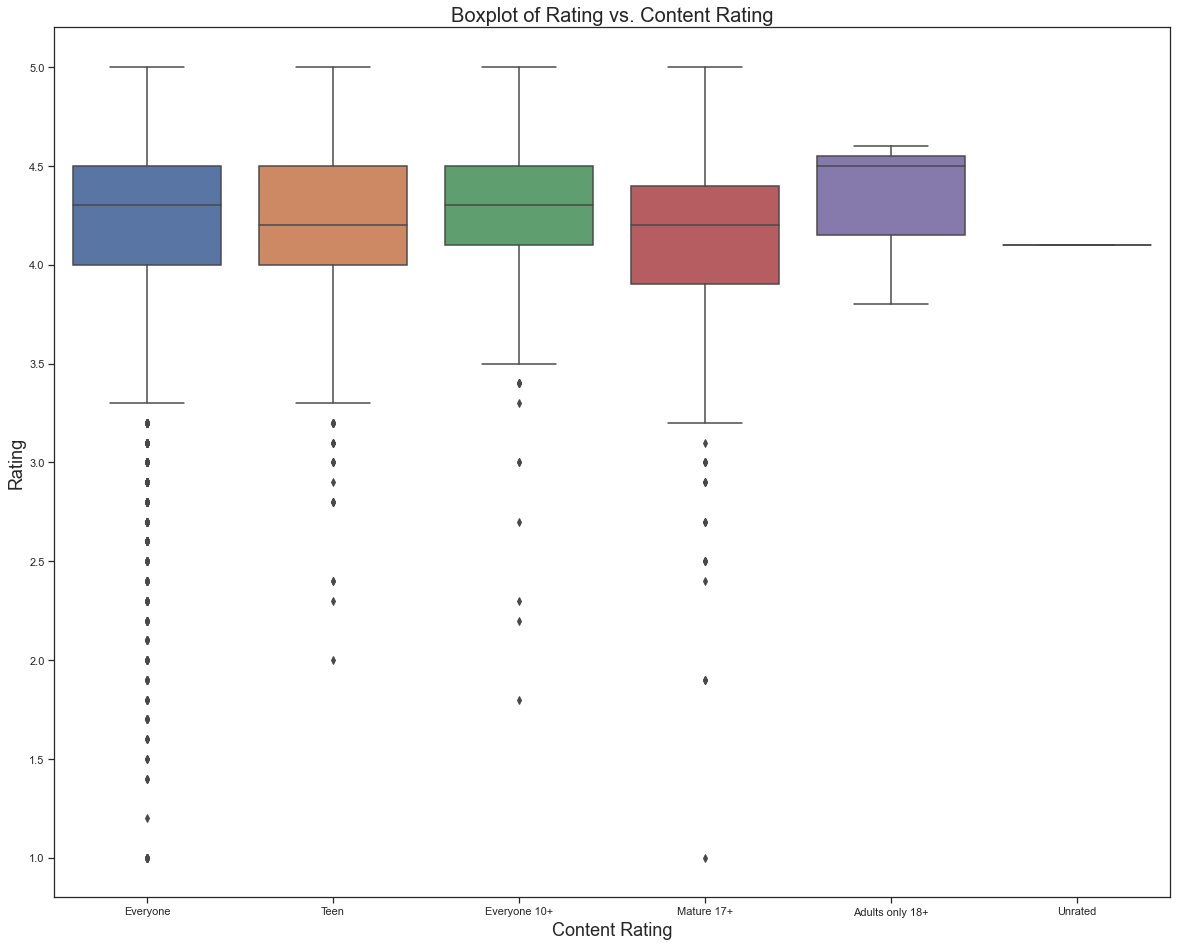

In [294]:
plt.figure(figsize=(20, 16))
sns.boxplot(x="Content_Rating", y="Rating", data=df)
plt.title("Boxplot of Rating vs. Content Rating", fontsize=20)
plt.xlabel("Content Rating",fontsize=18)
plt.ylabel("Rating", fontsize=18)
plt.show()

The mean rating for adult only 18+ apps is higher compared to other content rating categories, which could be due to their more specialized and unique features catering to a specific audience with higher expectations. However, other factors such as app features, target audience, and competition can also influence the rating of an app. Therefore, the relationship between content rating and app rating is complex and can vary depending on the characteristics of the app and its target audience.

## 7.5 Make boxplot for Ratings vs. Category

Which categpory has the best ratings?

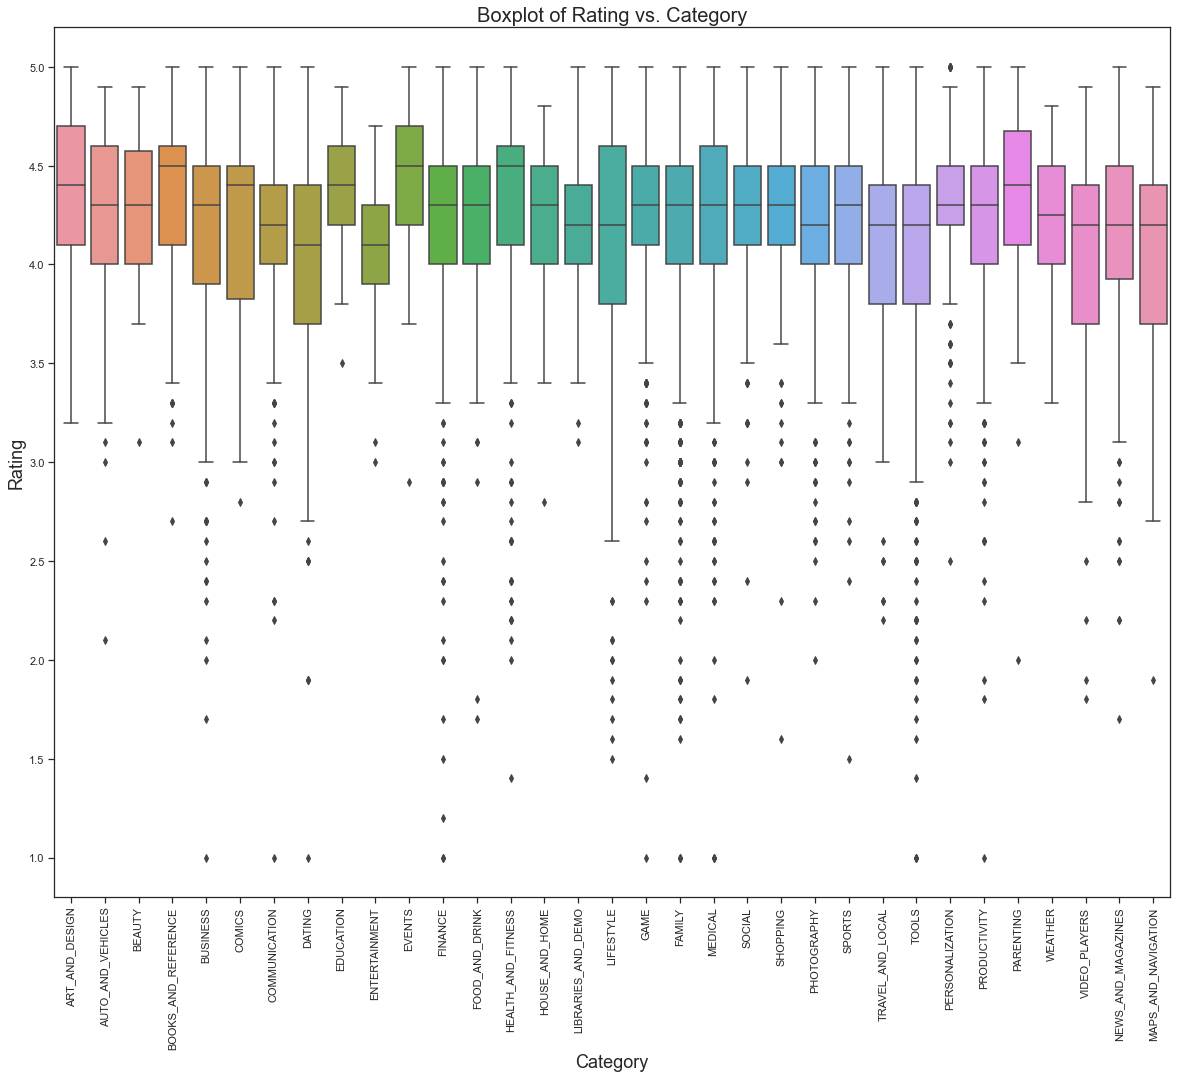

In [299]:
plt.figure(figsize=(20, 16))
sns.boxplot(x="Category", y="Rating", data=df)
plt.title("Boxplot of Rating vs. Category", fontsize=20)
plt.xlabel("Category",fontsize=18)
plt.ylabel("Rating", fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [298]:
genre_ratings = df.groupby("Category")["Rating"].mean()
sorted = genre_ratings.sort_values(ascending=False)
sorted

Category
EVENTS                 4.435556
EDUCATION              4.380795
ART_AND_DESIGN         4.355738
BOOKS_AND_REFERENCE    4.344444
PERSONALIZATION        4.322260
PARENTING              4.300000
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.269655
SOCIAL                 4.246948
GAME                   4.244131
WEATHER                4.231429
SHOPPING               4.229327
SPORTS                 4.219016
HOUSE_AND_HOME         4.197368
AUTO_AND_VEHICLES      4.190411
MEDICAL                4.186819
FAMILY                 4.185192
LIBRARIES_AND_DEMO     4.178462
PRODUCTIVITY           4.174386
FOOD_AND_DRINK         4.166972
COMICS                 4.155172
PHOTOGRAPHY            4.137903
FINANCE                4.133119
NEWS_AND_MAGAZINES     4.129730
BUSINESS               4.119795
ENTERTAINMENT          4.107519
COMMUNICATION          4.104938
LIFESTYLE              4.100000
TRAVEL_AND_LOCAL       4.083415
MAPS_AND_NAVIGATION    4.035593
TOOLS                  4.020178

In summary, there are several possible reasons why the mean rating for the "Events" category app is higher than for other app categories, and why the mean rating for the "Dating" category app is lower. These reasons include differences in user expectations, user demographics, and app quality. Ultimately, many factors can affect app ratings, and it's important to consider all of these factors when trying to understand why an app has a particular rating.

## 8. Data preprocessing
For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

In [297]:
inp1= df.copy()
inp1.shape

(8516, 11)

### 8.1 Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.



In [302]:
inp1[["Reviews", "Installs"]]=np.log1p(inp1[["Reviews", "Installs"]])

### 8.2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [303]:
inp1.drop(['App', 'Last_Updated'], axis=1,inplace=True)
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content_Rating', 'Genres'],
      dtype='object')

In [304]:
inp1.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
dtype: int64

### 8.3 Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [307]:
inp2 = inp1.copy()

In [308]:
dummy_var_Category = pd.get_dummies(inp2["Category"])
dummy_var_Category.head()

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [309]:
dummy_var_Genres = pd.get_dummies(inp2["Genres"])
dummy_var_Genres.head()

,Action,Action;Action & Adventure,Adventure,Adventure;Action & Adventure,Adventure;Brain Games,Adventure;Education,Arcade,Arcade;Action & Adventure,Arcade;Pretend Play,Art & Design,...,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [310]:
dummy_var_CR = pd.get_dummies(inp2["Content_Rating"])
dummy_var_CR.head()

,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0


In [312]:
inp2 = pd.concat([inp2, dummy_var_Category], axis=1)
# drop original column "fuel-type" from "df"
inp2.drop("Category", axis = 1, inplace=True)

inp2 = pd.concat([inp2, dummy_var_Genres], axis=1)

# drop original column "fuel-type" from "df"
inp2.drop("Genres", axis = 1, inplace=True)

inp2 = pd.concat([inp2, dummy_var_CR], axis=1)

# drop original column "fuel-type" from "df"
inp2.drop("Content_Rating", axis = 1, inplace=True)

In [313]:
inp2.shape

(8516, 160)

## 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [379]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [380]:
d1 = inp2

In [381]:
dummy_var_Type = pd.get_dummies(d1["Type"])
d1 = pd.concat([d1, dummy_var_Type], axis=1)
# drop original column "fuel-type" from "df"
d1.drop("Type", axis = 1, inplace=True)

In [382]:
df_train,df_test = tts(d1,test_size=0.3,random_state= 5)

In [383]:
df_train.shape

(5961, 161)

In [384]:
df_test.shape

(2555, 161)

In [385]:
dummy_var_Type.head()

,Free,Paid
0,1,0
1,1,0
2,1,0
4,1,0
5,1,0


## 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [386]:
X_train = df_train.drop("Rating",axis=1)
y_train = df_train["Rating"]
X_test= df_test.drop("Rating",axis=1)
y_test= df_test["Rating"]

## 11. Model building

### 11.1 Use linear regression as the technique

In [387]:
lm = LinearRegression()
lm

LinearRegression()

In [388]:
lm.fit(X_train,y_train)

LinearRegression()

In [389]:
lm.intercept_

4.669147490959128

In [390]:
lm.coef_

array([ 1.77567212e-01, -5.31119745e-05, -1.56257313e-01, -1.34639940e-03,
        4.57895018e-02,  1.16739681e-02,  7.57763446e-02,  7.61063324e-02,
       -1.48249847e-02,  1.77711598e-01, -7.76201101e-02, -1.51592322e-01,
       -5.65762578e-03, -4.68097855e-02,  9.33268557e-02,  2.26365852e-02,
       -4.77073581e-02, -3.54700819e-02,  1.57212718e-01,  2.15127231e-02,
        5.09546254e-03,  3.66449587e-02, -9.86268251e-02, -9.75895134e-02,
        3.02553619e-02, -5.86310774e-02,  1.68621246e-02,  3.74027697e-02,
       -4.86891223e-02, -1.39791730e-02, -1.46301240e-02, -2.91539190e-02,
        5.54982227e-03, -2.79452604e-02, -3.12439072e-02, -1.87778538e-03,
       -1.15081512e-02, -2.33733155e-01, -3.34508953e-02, -3.04799211e-01,
       -1.35560318e-01,  2.35383323e-01, -3.19770566e-01, -1.88894672e-01,
       -3.11142851e-01,  1.64410453e-01,  2.29594821e-01,  1.54269193e-01,
       -2.98372438e-16,  1.16739681e-02,  7.57763446e-02, -1.93601806e-01,
       -2.73780898e-01, -

### 11.2 Report the R2 on the train set

In [ ]:
train_set_R2 = lm.score(X_train,y_train)
print("R-squared on the train set: ", train_set_R2)

An R-squared (R2) value of 0.16291 on the train set means that the linear regression model explains about 17% of the variance in the target variable based on the predictor variables in the training set. A higher R2 value indicates a better fit for the data, and a value of 1 indicates that the model explains all of the variance in the target variable. However, R2 is only one metric of model performance and should be used in combination with other evaluation metrics to fully assess the quality of the model.

## 12. Make predictions on test set and report R2.

In [392]:
y_pred=lm.predict(X_test)
y_pred[0:5]  #The output of the first five predicted value

array([3.86382468, 3.94391026, 3.92014751, 4.09188236, 4.49148301])

In [393]:
test_set_R2 = lm.score(X_test,y_test)
print("R-squared on the test set: ", test_set_R2)

R-squared on the test set:  0.12261476198074106


If the R-squared (R2) on the test set is 0.13968, it means that the linear regression model explains about 13.97% of the variance in the target variable based on the predictor variables in the test set.

This R2 value is lower than the R2 value on the training set, indicating that the model may not be generalizing well to new, unseen data. It is important to keep in mind that the R2 value is only one metric of model performance, and it should be used in combination with other evaluation metrics to fully assess the quality of the model.

In summary, the R-squared value on the training set indicates how well the model fits the training data, while the R-squared value on the test set indicates how well the model generalizes to new, unseen data. If the R-squared value is higher on the training set than on the test set, it suggests that the model may be overfitting to the training data and not generalizing well to new data. In this case, it may be necessary to adjust the model or acquire more data to improve its performance on the test set.